In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [208]:
tickers = [
    "BAC",  # Bank of America (still a major active bank)
    "C",    # Citigroup (still a major active bank)
    "GS",   # Goldman Sachs (converted to a bank holding company, still a major active bank)
    "JPM",  # JPMorgan Chase (still a major active bank, acquired Bear Stearns and Washington Mutual)
    "MS",   # Morgan Stanley (converted to a bank holding company, still a major active bank)
    "WFC",  # Wells Fargo (still a major active bank, acquired Wachovia)
    "USB",  # U.S. Bancorp (still a major active bank)
    "RF",   # Regions Financial Corporation (still an active bank)
    "COF",  # Capital One Financial (still an active bank)
    #"FITB", # Fifth Third Bancorp (still an active bank)
    "KEY",  # KeyCorp (still an active bank)
    "MTB",  # M&T Bank Corp. (still an active bank)
    "PNC",  # PNC Financial Services Group (still an active bank)
    #"NTIC", # Northern Trust Corporation (still an active bank)
    "CMA",  # Comerica (still an active bank)
    "STT",  # State Street Corp. (still an active bank)
    "TFC",  # Truist Financial Corporation (result of BBT and STI merger, active today)
]

# Corrected interval from '1d`' to '1d'
prices = yf.download(tickers, start='2003-01-01',end ='2007-12-31', interval='1d')

# You can then print or work with the 'prices' DataFrame
# print(prices.head())

[*********************100%***********************]  15 of 15 completed


In [209]:
prices = prices['Close']

In [214]:
prices

Ticker,BAC,C,CMA,COF,GS,JPM,KEY,MS,MTB,PNC,RF,STT,TFC,USB,WFC
Date,,,,,,,,,,,,,,,
2003-01-02,20.762493,214.804291,21.490501,23.278458,50.043819,13.705765,12.220177,21.661236,43.985092,22.245193,13.700117,26.127436,16.265106,10.254896,12.930229
2003-01-03,20.633245,213.386047,21.409155,23.300482,50.568306,13.975142,12.107026,21.619913,43.338791,22.566994,13.545375,25.876945,16.226570,10.278821,12.749203
2003-01-06,20.929939,220.477219,22.246571,24.393938,52.450798,15.074189,12.620913,22.203529,44.862949,23.113554,13.993719,26.731165,16.539114,10.838699,13.002111
2003-01-07,20.962244,218.527161,22.069508,23.630726,52.235233,14.998758,12.578490,22.322327,44.189735,23.164639,13.846911,26.442135,16.423525,10.757353,12.922238
2003-01-08,20.877064,216.813461,21.882896,25.986460,50.956276,14.422297,12.460618,21.766733,43.990459,23.072689,13.696148,25.690699,16.290791,10.695142,12.738553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-12-21,30.417704,214.766693,25.991976,35.285542,157.315109,28.131889,13.597659,37.003139,48.471725,40.269043,14.867601,55.115837,16.505062,18.946327,18.984730
2007-12-24,30.678921,220.022263,26.397747,35.677769,160.857681,28.591078,13.759953,37.411491,48.696018,40.722057,15.086968,56.335300,16.691093,19.098930,19.503580
2007-12-26,30.693434,216.258255,26.321297,35.403946,162.636475,28.661219,13.864293,37.431911,48.554371,40.795528,14.916352,55.855736,16.556740,19.098930,19.541079


In [216]:
means = prices.mean()
stds  = prices.std(ddof=0)      # population‐style; use ddof=1 for sample std
prices_z = (prices - means) / stds

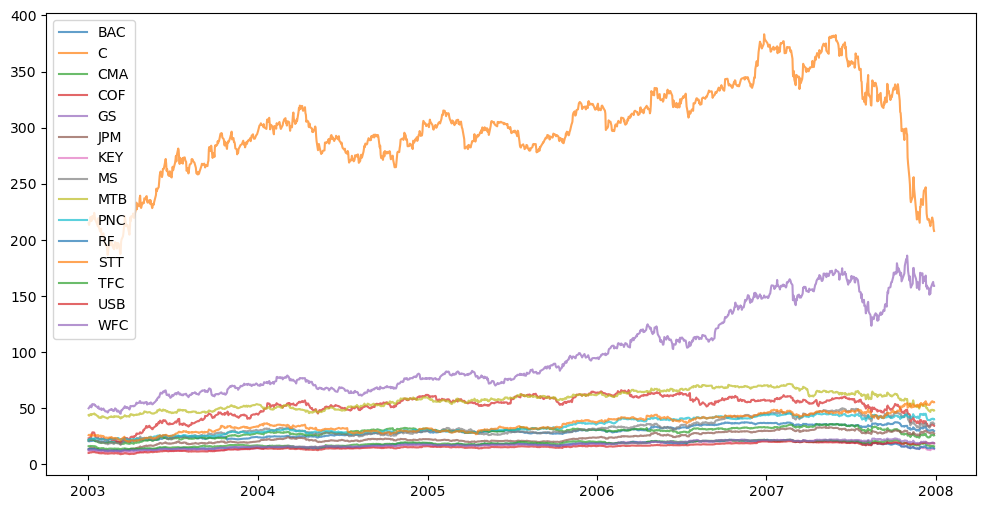

In [231]:
plt.figure(figsize=(12, 6))
plt.plot(prices, alpha = 0.7)
plt.legend(prices_z.columns)
plt.show()

In [229]:
len(prices_z)

1257

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import my_functions as mf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import sounddevice as sd


In [239]:
# num_series = 15
# z = mf.random_walk(1200).reshape(-1, 1) #constant
# eps = np.random.normal(0, 1, size=(1200, num_series)) # DEPENDS on T
# et = np.random.normal(0, 1, size=(1200, num_series)) #constant

# B = 1000
# delta = 0.015
# multipliers = mf.unique_rounded_uniform(0, 2, num_series, decimals=2) #constant

# T = 2000
# e = eps[:T,:].copy()
# common_fac = z[:T].copy()

# num_of_rw = 0.6
# coint_frac = 0.4
# innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

# innov = innov_8
# crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
# print(crit_val)
# crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
# crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

# print("\n")

# """ Run Experiment """
# mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
# print("Multipliers:", multipliers)

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [249]:
pd.read_csv('Unemp_rate.csv', index_col = ['TIME'])

,Belgium,Denmark,Germany,Ireland,Greece,Spain,France,Italy,Cyprus,Hungary,Malta,Netherlands,Austria,Portugal
TIME,,,,,,,,,,,,,,
2000-01,7.3,5.0,8.2,4.9,11.5,12.8,9.8,10.6,4.6,6.6,6.9,3.9,4.3,5.6
2000-02,7.1,4.6,8.1,4.8,11.6,12.4,9.6,10.6,4.8,6.6,6.9,3.9,4.3,5.4
2000-03,6.9,4.4,8.1,4.7,11.6,12.2,9.5,10.5,5.1,6.5,6.9,3.8,4.1,5.3
2000-04,6.9,4.4,8.0,4.7,11.5,12.0,9.4,10.3,5.4,6.5,6.8,3.8,3.8,5.2
2000-05,6.8,4.5,8.0,4.6,11.5,11.9,9.3,10.3,5.3,6.4,6.7,3.7,3.7,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-08,7.6,8.1,5.0,15.5,25.9,25.2,9.7,10.9,12.1,10.3,6.5,6.8,5.5,16.9
2012-09,7.8,7.7,5.0,15.4,26.6,25.5,9.8,11.2,12.6,10.3,6.4,6.9,5.5,17.0
2012-10,8.2,7.6,5.0,15.2,26.2,25.7,10.0,11.6,13.0,10.4,6.5,7.0,5.3,17.5


In [ ]:
pd.read_csv